Troy Mazerolle

Student Number: 8972394

# Practical Lab 4 - Multivariate Linear and Polynomial Regression, and Evaluation using R-Squared, MAPE and MAE

## 0: Set Up

In [56]:
# Libraries
from sklearn import datasets
from sklearn import linear_model
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import mean_absolute_error, mean_absolute_percentage_error, r2_score
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import norm
import pandas as pd

## 1. Get the data, and run a train-validation-test split

In [57]:
X, y = datasets.load_diabetes(as_frame = True, scaled = False, return_X_y = True)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 8972394)

## 2. Run a multivariate linear regression on all variables

In [58]:
linmodDeg1 = linear_model.LinearRegression()
linmodDeg1.fit(X_train, y_train)
print('Intercept: \n', linmodDeg1.intercept_)
print('Coefficients: ')

for i in range(len(linmodDeg1.feature_names_in_)):
    print(linmodDeg1.feature_names_in_[i], ": ", linmodDeg1.coef_[i])

Intercept: 
 -277.328195244129
Coefficients: 
age :  0.06948591018848689
sex :  -28.255852927252803
bmi :  5.8963034530582625
bp :  1.2760739438930113
s1 :  -0.40094060077873284
s2 :  0.03828461921148224
s3 :  -0.27552158043515507
s4 :  7.573569716768001
s5 :  48.770239179270575
s6 :  0.21751683186061851


## 3. Run a polynomial regression of the 2nd degree on the BMI feature alone

Since the next part will have us run a polynomial regression on all features in the second degree, we will transform the data now.  Since the transformed data will include $BMI$ and $BMI^2$, we can simply take those columns from the complete transformed data to do this part.

In [59]:
polyFeatsTrain = PolynomialFeatures(degree = 2, include_bias = False)
polyFeatsTest = PolynomialFeatures(degree = 2, include_bias = False)

# Transforming training features
XTrainDeg2 = polyFeatsTrain.fit_transform(X_train)
XTrainDeg2 = pd.DataFrame(XTrainDeg2, columns = polyFeatsTrain.get_feature_names_out())

# Transforming testing features
XTestDeg2 = polyFeatsTest.fit_transform(X_test)
XTestDeg2 = pd.DataFrame(XTestDeg2, columns = polyFeatsTest.get_feature_names_out())

# Taking the BMI subsets
XTrainBMIDeg2 = XTrainDeg2[['bmi', 'bmi^2']]
XTestBMIDeg2 = XTestDeg2[['bmi', 'bmi^2']]

# Running regression for BMI on training data
linmodBMIDeg2 = linear_model.LinearRegression()
linmodBMIDeg2.fit(XTrainBMIDeg2, y_train)
print('Intercept: \n', linmodBMIDeg2.intercept_)
print('Coefficients: ')
for i in range(len(linmodBMIDeg2.feature_names_in_)):
    print(linmodBMIDeg2.feature_names_in_[i], ": ", linmodBMIDeg2.coef_[i])


Intercept: 
 -107.66023748350582
Coefficients: 
bmi :  9.307628513272057
bmi^2 :  0.018608621755219504


## 4. Run a multivariate polynomial regression of the 2nd degree on all variables

In [60]:
linmodDeg2 = linear_model.LinearRegression()
linmodDeg2.fit(XTrainDeg2, y_train)
print('Intercept: \n', linmodDeg2.intercept_)
print('Coefficients: ')

for i in range(len(linmodDeg2.coef_)):
    print(polyFeatsTrain.get_feature_names_out()[i], ": ", linmodDeg2.coef_[i])

Intercept: 
 4352.832474201069
Coefficients: 
age :  -5.003445955935329
sex :  -18.335317719926323
bmi :  -21.410026776642862
bp :  -5.439537306725557
s1 :  -94.41612298894579
s2 :  100.25001742387201
s3 :  82.70755425111248
s4 :  -108.47343681947235
s5 :  -1764.9277412255062
s6 :  -8.55451149220733
age^2 :  0.02244091995477704
age sex :  1.2246479671112833
age bmi :  -0.02599582178138659
age bp :  0.0009283660544632602
age s1 :  0.012416271153409403
age s2 :  -0.02520232172181494
age s3 :  -0.005145556001358326
age s4 :  0.17840024942551005
age s5 :  0.02478875323999881
age s6 :  0.02075637782203913
sex^2 :  -55.00595306411981
sex bmi :  1.1957909229446013
sex bp :  0.14197660631448858
sex s1 :  1.1492934890766426
sex s2 :  -1.0624638613080306
sex s3 :  -0.5922572926775227
sex s4 :  -16.254879611910656
sex s5 :  -3.239563165694328
sex s6 :  0.7179554403406865
bmi^2 :  0.041599256816089114
bmi bp :  0.11564366964364114
bmi s1 :  -0.06160053717014491
bmi s2 :  0.03694001099991062
bmi s3

## 5. Compare the three models by looking at R-squared, MAPE and MAE. Explain what the values mean for a non-expert and add your insight about the values of each model. 

First, we need predicted values, so we will run the predictions below.

In [61]:
# Degree 1, all covariates
yPredTrainDeg1 = linmodDeg1.predict(X_train)
yPredTestDeg1 = linmodDeg1.predict(X_test)

# Degree 2, just BMI
yPredTrainBMIDeg2 = linmodBMIDeg2.predict(XTrainBMIDeg2)
yPredTestBMIDeg2 = linmodBMIDeg2.predict(XTestBMIDeg2)

# Degree 2, all covariates
yPredTrainDeg2 = linmodDeg2.predict(XTrainDeg2)
yPredTestDeg2 = linmodDeg2.predict(XTestDeg2)

In [62]:
# Degree 1 accuracy metrics
r2TrainDeg1 = r2_score(y_train, yPredTrainDeg1)
r2TestDeg1 = r2_score(y_test, yPredTestDeg1)
maeTrainDeg1 = mean_absolute_error(y_train, yPredTrainDeg1)
maeTestDeg1 = mean_absolute_error(y_test, yPredTestDeg1)
mapeTrainDeg1 = mean_absolute_percentage_error(y_train, yPredTrainDeg1)
mapeTestDeg1 = mean_absolute_percentage_error(y_test, yPredTestDeg1)

# Degree 2 BMI only accuracy metrics
r2TrainBMIDeg2 = r2_score(y_train, yPredTrainBMIDeg2)
r2TestBMIDeg2 = r2_score(y_test, yPredTestBMIDeg2)
maeTrainBMIDeg2 = mean_absolute_error(y_train, yPredTrainBMIDeg2)
maeTestBMIDeg2 = mean_absolute_error(y_test, yPredTestBMIDeg2)
mapeTrainBMIDeg2 = mean_absolute_percentage_error(y_train, yPredTrainBMIDeg2)
mapeTestBMIDeg2 = mean_absolute_percentage_error(y_test, yPredTestBMIDeg2)

# Degree 2 accuracy metrics
r2TrainDeg2 = r2_score(y_train, yPredTrainDeg2)
r2TestDeg2 = r2_score(y_test, yPredTestDeg2)
maeTrainDeg2 = mean_absolute_error(y_train, yPredTrainDeg2)
maeTestDeg2 = mean_absolute_error(y_test, yPredTestDeg2)
mapeTrainDeg2 = mean_absolute_percentage_error(y_train, yPredTrainDeg2)
mapeTestDeg2 = mean_absolute_percentage_error(y_test, yPredTestDeg2)

# Outputting Results
print("Training Scores:")
print("\t R2\t MAE\t MAPE")
print("Deg1All\t", round(r2TrainDeg1, 2), "\t", round(maeTrainDeg1, 2), "\t", round(mapeTrainDeg1, 2))
print("Deg2BMI\t", round(r2TrainBMIDeg2, 2), "\t", round(maeTrainBMIDeg2, 2), "\t", round(mapeTrainBMIDeg2, 2))
print("Deg2All\t", round(r2TrainDeg2, 2), "\t", round(maeTrainDeg2, 2), "\t", round(mapeTrainDeg2, 2))
print("\nTesting Scores:")
print("\t R2\t MAE\t MAPE")
print("Deg1All\t", round(r2TestDeg1, 2), "\t", round(maeTestDeg1, 2), "\t", round(mapeTestDeg1, 2))
print("Deg2BMI\t", round(r2TestBMIDeg2, 2), "\t", round(maeTestBMIDeg2, 2), "\t", round(mapeTestBMIDeg2, 2))
print("Deg2All\t", round(r2TestDeg2, 2), "\t", round(maeTestDeg2, 2), "\t", round(mapeTestDeg2, 2))


Training Scores:
	 R2	 MAE	 MAPE
Deg1All	 0.52 	 42.74 	 0.37
Deg2BMI	 0.36 	 50.41 	 0.45
Deg2All	 0.61 	 38.19 	 0.33

Testing Scores:
	 R2	 MAE	 MAPE
Deg1All	 0.47 	 45.65 	 0.46
Deg2BMI	 0.27 	 56.73 	 0.56
Deg2All	 0.41 	 46.87 	 0.47


$R^2$ measures the proportion of the variance in the dependent variable that can be predicted from the independent variables in a regression model.  It is defined as $R^2 = 1 - \frac{SS_{res}}{SS_{tot}}$, where $SS_{res}$ is the sum of squared residuals and $SS_{tot}$ is the sum of squares between the observed dependent values and the mean of the dependent variables.  The closer $R^2$ is to 1, the stronger the model is.

MAE is mean-absolute error, which is the average of absolute distances between the observed and predicted values.  It is defined as $MAE = \frac{\sum_{i=1}^{n}|y_{i_{actual}} - y_{i_{predicted}}|}{n}$ for $n$ observations.  The model is stronger when MAE is small.

MAPE is mean-absolute percentage error, which is the average of absolute distances between observed and predicted values relative to what the actual value should have been.  This provides a standardized version of MAE, since MAPE will divide the measured error by what the value should have been.  It is defined as $MAPE = \frac{\sum_{i=1}^{n}|\frac{y_{i_{actual}} - y_{i_{predicted}}}{y_{i_{actual}}}|}{n}$ for $n$ observations.  The closer $MAPE$ is to 0, the stronger the model is.

In all three cases, the degree 1 model with all observations has the highest $R^2$ and lowest MAE and MAPE.  Also, the degree 2 model with BMI only has the lowest $R^2$ and highest MAE and MAPE.  The degree 2 model with all observations is in the middle between the two, although the scores are a lot closer to the degree 1 model.  This suggests that the degree 1 model is the strongest model.

Looking at the training error metrics, the degree 2 model performs better than the degree 1 model.  Since the testing error metrics do not show the same result, this suggests that the degree 2 model is overfitting the data, where the degree 2 model fits the training data extremely well at the cost of test accuracy.

When evaluating and comparing regression models, I also like to plot histograms of their residuals.  A strong regression model should theoretically have normally distributed residuals.

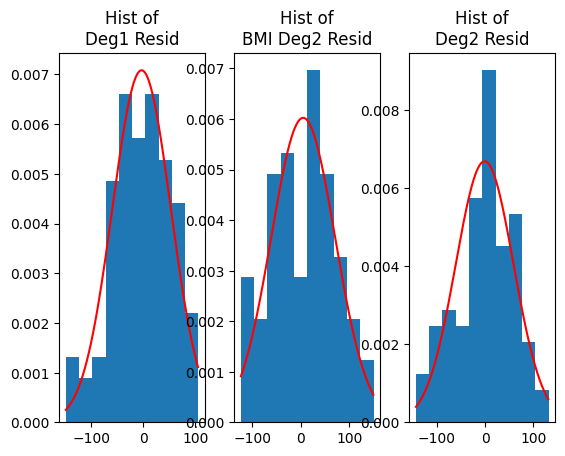

In [63]:
# Calculating Test Residuals
residualsDeg1 = y_test - yPredTestDeg1
residualsBMIDeg2 = y_test - yPredTestBMIDeg2
residualsDeg2 = y_test - yPredTestDeg2

# Plotting results
fig, histograms = plt.subplots(1,3)
histograms[0].hist(residualsDeg1, density = True)
histograms[0].set_title("Hist of\nDeg1 Resid")
histograms[1].hist(residualsBMIDeg2, density = True)
histograms[1].set_title("Hist of\nBMI Deg2 Resid")
histograms[2].hist(residualsDeg2, density = True)
histograms[2].set_title("Hist of\nDeg2 Resid")

# Calculating means and standard deviations to use for histograms
residTrainMean = np.mean(residualsDeg1)
residTrainSTD = np.std(residualsDeg1)
residTestMean = np.mean(residualsBMIDeg2)
residTestSTD = np.std(residualsBMIDeg2)
residAllMean = np.mean(residualsDeg2)
residAllSTD = np.std(residualsDeg2)

# Plotting histograms of best fit
xvals1 = np.arange(min(residualsDeg1.to_numpy()), 
                  max(residualsDeg1.to_numpy()))
xvals2 = np.arange(min(residualsBMIDeg2.to_numpy()), 
                  max(residualsBMIDeg2.to_numpy()))
xvals3 = np.arange(min(residualsDeg2.to_numpy()), 
                  max(residualsDeg2.to_numpy()))
histograms[0].plot(xvals1, norm.pdf(xvals1, residTrainMean, residTrainSTD), color = "red")
histograms[1].plot(xvals2, norm.pdf(xvals2, residTestMean, residTestSTD), color = "red")
histograms[2].plot(xvals3, norm.pdf(xvals3, residAllMean, residAllSTD), color = "red");

None of these histograms look completely normal, but the first histogram representing the degree 1 model will all features seems to be the closest.  This aligns with what we observed earlier that the degree 1 model is the strongest.

## 6.1 How many parameters are we fitting for each of the three models? Explain these values.

### Model 1

The first model simply fits 10 co-efficients and 1 intercept.  These values correspond to the y-intercept of the model and the coefficients of each feature.

In [64]:
print('Intercept: \n', linmodDeg1.intercept_)
print('Coefficients: ')
for i in range(len(linmodDeg1.feature_names_in_)):
    print(linmodDeg1.feature_names_in_[i], ": ", linmodDeg1.coef_[i])

Intercept: 
 -277.328195244129
Coefficients: 
age :  0.06948591018848689
sex :  -28.255852927252803
bmi :  5.8963034530582625
bp :  1.2760739438930113
s1 :  -0.40094060077873284
s2 :  0.03828461921148224
s3 :  -0.27552158043515507
s4 :  7.573569716768001
s5 :  48.770239179270575
s6 :  0.21751683186061851


### Model 2

The second model simply fits 2 co-efficients and 1 intercept.  In this case, the model is a polynomial fit where the given features were $BMI$ and $BMI^2$.  Therefore the co-efficients correspond to $BMI$ and $BMI^2$ respectively.

In [65]:
print('Intercept: \n', linmodBMIDeg2.intercept_)
print('Coefficients: ')
for i in range(len(linmodBMIDeg2.feature_names_in_)):
    print(linmodBMIDeg2.feature_names_in_[i], ": ", linmodBMIDeg2.coef_[i])

Intercept: 
 -107.66023748350582
Coefficients: 
bmi :  9.307628513272057
bmi^2 :  0.018608621755219504


### Model 3

The third model is a bit more complicated.  With a polynomial model of degree 2 including ALL features, we get the standard linear features and their corresponding quadratic forms, but also the *interaction* values between each linear feature.  For example, when we have features `age` and `bmi`, transforming the data into the second degree will give us `age^2`, `bmi^2`, and `age*bmi`.  When we take every combination of interaction terms, we get:
* 10 linear features
* 10 quadratic features
* 9 + 8 + 7 + 6 + 5 + 4 + 3 + 2 + 1 = 45 interaction features

for a total of 65 co-efficients.  The model also fits one intercept.

In [66]:
print('Intercept: \n', linmodDeg2.intercept_)
print('Coefficients: ')
for i in range(len(linmodDeg2.coef_)):
    print(polyFeatsTrain.get_feature_names_out()[i], ": ", linmodDeg2.coef_[i])

Intercept: 
 4352.832474201069
Coefficients: 
age :  -5.003445955935329
sex :  -18.335317719926323
bmi :  -21.410026776642862
bp :  -5.439537306725557
s1 :  -94.41612298894579
s2 :  100.25001742387201
s3 :  82.70755425111248
s4 :  -108.47343681947235
s5 :  -1764.9277412255062
s6 :  -8.55451149220733
age^2 :  0.02244091995477704
age sex :  1.2246479671112833
age bmi :  -0.02599582178138659
age bp :  0.0009283660544632602
age s1 :  0.012416271153409403
age s2 :  -0.02520232172181494
age s3 :  -0.005145556001358326
age s4 :  0.17840024942551005
age s5 :  0.02478875323999881
age s6 :  0.02075637782203913
sex^2 :  -55.00595306411981
sex bmi :  1.1957909229446013
sex bp :  0.14197660631448858
sex s1 :  1.1492934890766426
sex s2 :  -1.0624638613080306
sex s3 :  -0.5922572926775227
sex s4 :  -16.254879611910656
sex s5 :  -3.239563165694328
sex s6 :  0.7179554403406865
bmi^2 :  0.041599256816089114
bmi bp :  0.11564366964364114
bmi s1 :  -0.06160053717014491
bmi s2 :  0.03694001099991062
bmi s3

## 6.2 Which model would you choose for deployment, and why?

Based on our observations in part 5, I would choose the degree 1 model with all features for deployment.  Not only does it have the strongest accuracy scores and report the best residual histogram, but it is also less computationally expensive than the degree 2 counterpart since we do not have to transform the data and the model only needs to train on 10 features instead of 65.